In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy
import scipy.stats

#  Distribution Based on SoC graph

In [11]:
data = pd.read_csv('http://smarthg.di.uniroma1.it/Test-an-EV/csv/EV1.2.csv')
data['status'] = ''

charging = 1
for t in range(1,len(data)):
    if (data['State of charge'][t] > data['State of charge'][t-1]) and (charging == 0):
        data.at[t-1,'status'] = 'Arrival'
        charging = 1
    if (data['State of charge'][t] < data['State of charge'][t-1]) and (charging == 1):
        data.at[t-1,'status'] = 'Departure'
        charging = 0


for ev in tqdm(range(2,185)):
    data2 = pd.read_csv('http://smarthg.di.uniroma1.it/Test-an-EV/csv/EV' + str(ev) + '.2.csv')
    data2['status'] = ''
    charging = 1
    for t in range(1,len(data2)):
        if (data2['State of charge'][t] > data2['State of charge'][t-1]) and (charging == 0):
            data2.at[t-1,'status'] = 'Arrival'
            charging = 1
        if (data2['State of charge'][t] < data2['State of charge'][t-1]) and (charging == 1):
            data2.at[t-1,'status'] = 'Departure'
            charging = 0
    data = data.append(data2)

  0%|          | 0/183 [00:00<?, ?it/s]C:\Users\SATIE\AppData\Local\Temp\ipykernel_70012\289994768.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data2)
  1%|          | 1/183 [00:00<00:58,  3.12it/s]C:\Users\SATIE\AppData\Local\Temp\ipykernel_70012\289994768.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data2)
  1%|          | 2/183 [00:00<00:38,  4.69it/s]C:\Users\SATIE\AppData\Local\Temp\ipykernel_70012\289994768.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data2)
  2%|▏         | 3/183 [00:00<00:53,  3.39it/s]C:\Users\SATIE\AppData\Local\Temp\ipykernel_70012\289994768.py:25: FutureWarning: The frame.append method is deprecated and will be remo

In [13]:
data[['Date', 'Time']] = data['Date'].str.split(' ', expand=True)
data[['Time(h)','Time(m)','Time(s)']] = data['Time'].str.split(':', expand=True)
data['Time(decimal)'] = data['Time(h)'].astype(float) + data['Time(m)'].astype(float)/60

In [14]:
data

Date  State of charge     status      Time Time(h) Time(m)  \
0     2012-01-03             46.0  Departure  08:48:00      08      48   
1     2012-01-03             43.0             08:56:00      08      56   
2     2012-01-03             35.0             15:26:00      15      26   
3     2012-01-03             28.0             15:35:00      15      35   
4     2012-01-03             28.0             16:04:00      16      04   
...          ...              ...        ...       ...     ...     ...   
6719  2013-11-18             80.0             11:50:00      11      50   
6720  2013-11-18             80.0    Arrival  11:53:00      11      53   
6721  2013-11-18             97.0             13:53:00      13      53   
6722  2013-11-26             98.0             08:41:00      08      41   
6723  2013-11-26             99.0             08:56:00      08      56   

     Time(s)  Time(decimal)  
0         00       8.800000  
1         00       8.933333  
2         00      15.433333  
3         00      15.583333  
4         00      16.066667  
...      ...            ...  
6719      00      11.833333  
6720      00      11.883333  
6721      00      13.883333  
6722      00       8.683333  
6723      00       8.933333  

[850402 rows x 8 columns]

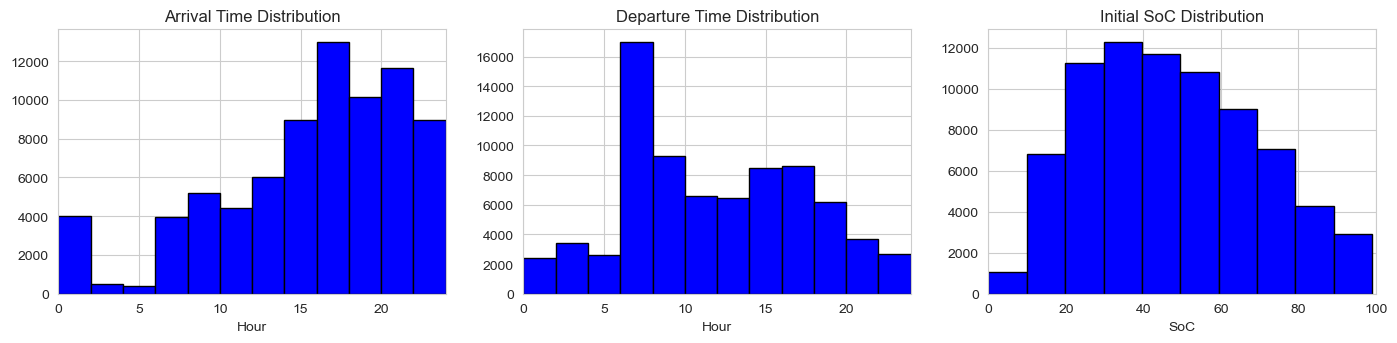

In [15]:
plt.figure(figsize=(17,3.5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1,3,1)
plt.hist(data[data['status'] == 'Arrival']['Time(decimal)'], color = 'blue', edgecolor = 'black',bins = 12);
plt.xlim(0,24);
plt.xlabel('Hour')
plt.title('Arrival Time Distribution')
plt.subplot(1,3,2)
plt.hist(data[data['status'] == 'Departure']['Time(decimal)'], color = 'blue', edgecolor = 'black',bins = 12);
plt.xlim(0,24);
plt.xlabel('Hour')
plt.title('Departure Time Distribution')
plt.subplot(1,3,3)
plt.hist(data[data['status'] == 'Arrival']['State of charge'], color = 'blue', edgecolor = 'black',bins = 10);
plt.xlim(0,100);
plt.xlabel('SoC')
plt.title('Initial SoC Distribution');

# Fitting Distribution on the Data

In [20]:
arrival_times = data[data['status'] == 'Arrival']['State of charge']
dist_names = [ 'alpha', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'exponweib', 'exponpow', 'f', 'foldcauchy', 'foldnorm', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'gilbrat',  'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm',  'reciprocal', 'rayleigh', 'rice', 't', 'triang', 'weibull_min', 'weibull_max']

dist_names = ['beta']

C:\Users\SATIE\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


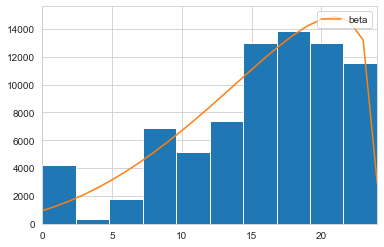

In [39]:
size = 200000
x = np.arange(size)
arrival_times = data[data['status'] == 'Arrival']['Time(decimal)'].values
h = plt.hist(arrival_times)

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(arrival_times)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) * size
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,24)
plt.legend(loc='upper right')
plt.show()

In [40]:
print("Parameters for the fitted distribution are:", params)

Parameters for the fitted distribution are: (3.450548827920404, 1.2612703268112546, -7.387639695283916, 31.390162883724102)


In [159]:
mu, sigma = 3.450, 1.26127 # mean and standard deviation
gen_dist = np.random.beta(mu, sigma, 100)
gen_dist = gen_dist*1440

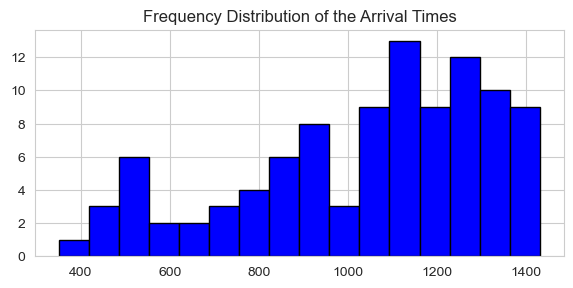

In [161]:
plt.figure(figsize=(15,3), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(1,2,2)
# matplotlib histogram
plt.hist(gen_dist, color = 'blue', edgecolor = 'black',bins = 16);
#plt.xlim(0,1440)
plt.title('Frequency Distribution of the Arrival Times');
